In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("marketing_AB.csv.zip")


In [ ]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
data.duplicated(subset = 'user id') .sum()

0

In [ ]:
data.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True )

In [ ]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
data_cat = data[['test group', 'converted','most ads day', 'most ads hour']]
data_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [ ]:
for i in data_cat.columns:
    print(i.upper(),":", data_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Text(0.5, 1.0, 'Count Plot - test group')

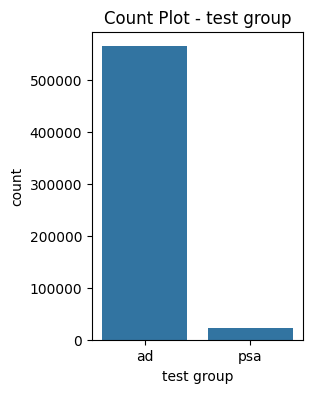

In [ ]:
variable = 'test group'
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable, data =data )
plt.title(f'Count Plot - {variable}')

Text(0.5, 1.0, 'Pie chart - test group')

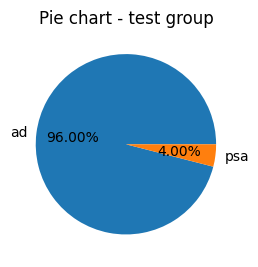

In [ ]:
plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts , labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Count Plot - converted')

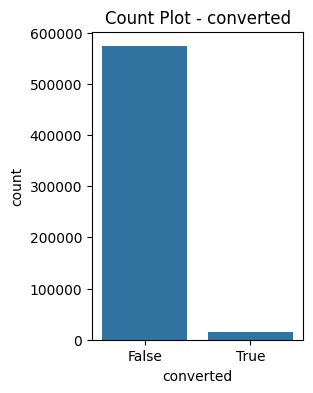

In [ ]:
variable = 'converted'
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable , data =data_cat)
plt.title(f'Count Plot - {variable}')



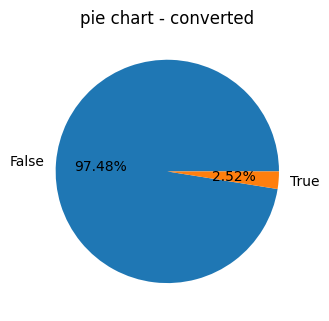

In [ ]:
plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts , labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')
plt.tight_layout()
plt.show()

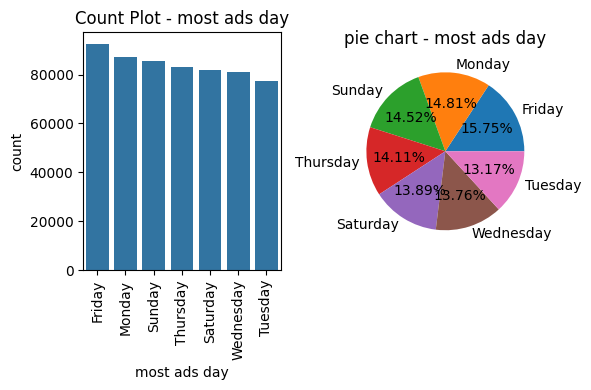

In [ ]:
variable = 'most ads day'

plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable ,data=data_cat, order = data_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts , labels=counts.index,autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')
plt.tight_layout()
plt.show()



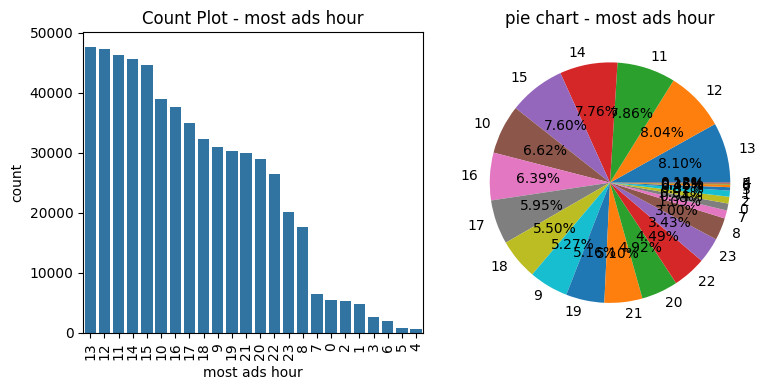

In [ ]:
variable = 'most ads hour'

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.countplot(x=variable ,data=data_cat, order = data_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts , labels=counts.index,autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')
plt.tight_layout()
plt.show()


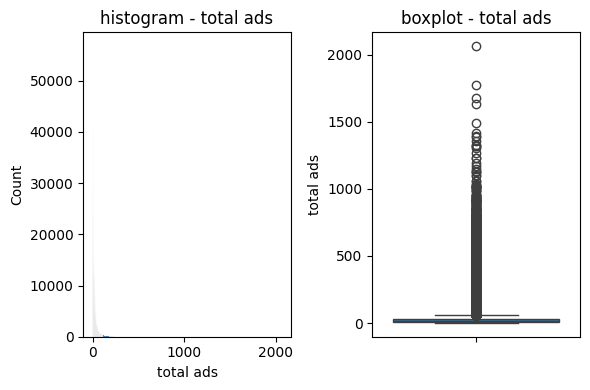

In [ ]:
variable = 'total ads'
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data = data)
plt.title(f'histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(y = variable ,data = data)
plt.title(f'boxplot - {variable}')
plt.tight_layout()
plt.show()

In [ ]:
data['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

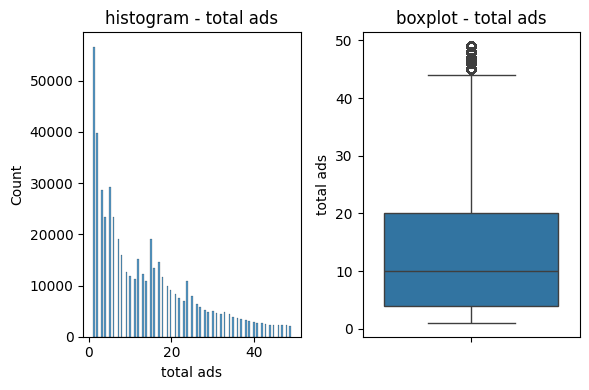

In [ ]:
variable = 'total ads'
plt.figure(figsize = (6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data = data[data['total ads']< 50])
plt.title(f'histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(y = variable ,data = data[data['total ads']<50])
plt.title(f'boxplot - {variable}')
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
ct_conversion_test_group = pd.crosstab(data['test group'], data['converted'],normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

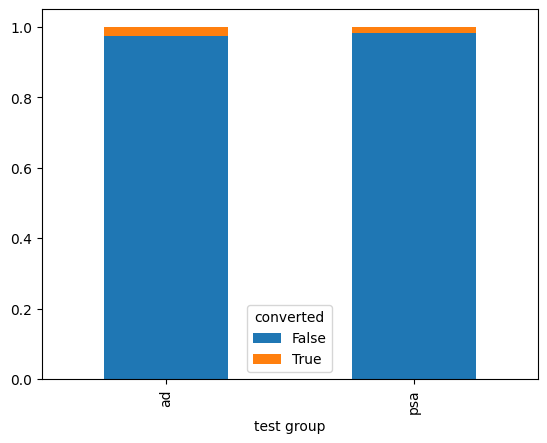

In [ ]:
ct_conversion_test_group.plot.bar(stacked = True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


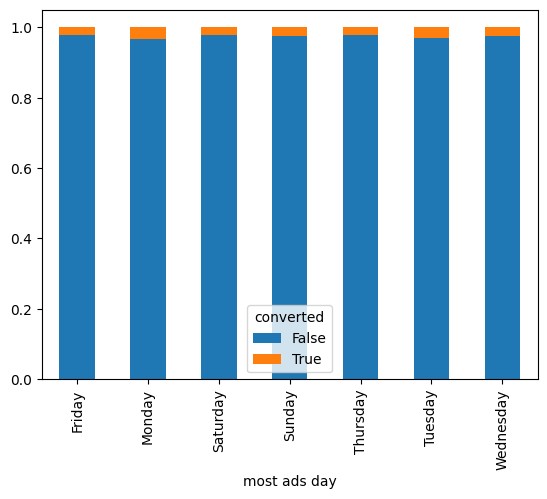

In [ ]:
ct_conversion_day = pd.crosstab(data['most ads day'],data['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True , ascending = False))
ct_conversion_day.plot.bar(stacked = True);


converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


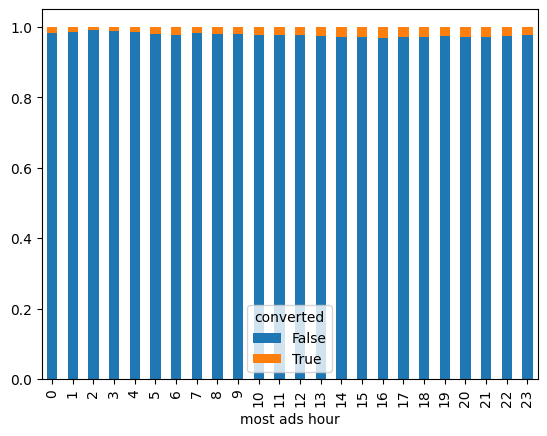

In [ ]:
ct_conversion_hour = pd.crosstab(data['most ads hour'],data['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True , ascending = False))
ct_conversion_hour.plot.bar(stacked = True);

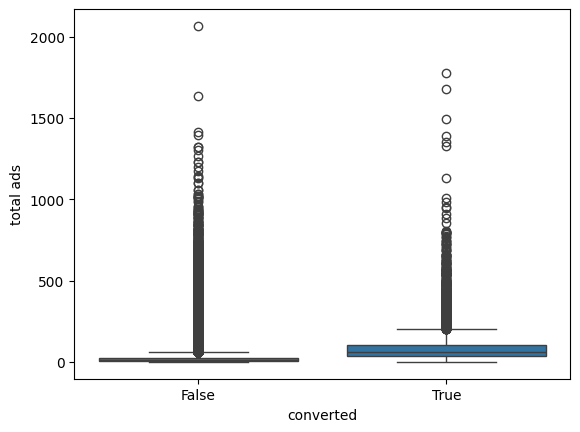

In [ ]:
sns.boxplot(x ='converted', y = 'total ads', data = data);

<Axes: xlabel='converted', ylabel='total ads'>

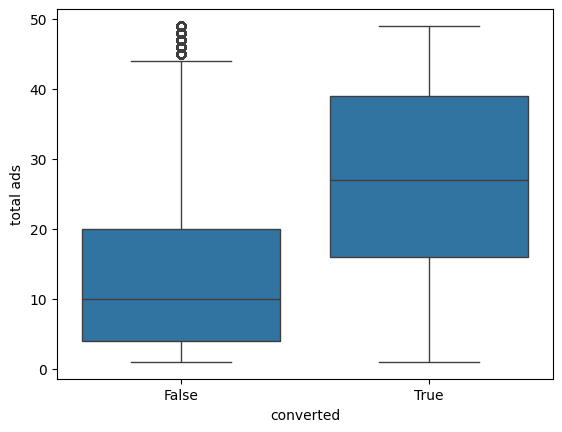

In [ ]:
sns.boxplot(x ='converted', y = 'total ads', data = data[data['total ads'] < 50 ])

STATISTICAL TESTS

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in data_cat.columns:
  if variable !='converted':
    contingency_table = pd.crosstab(data[variable], data_cat['converted'])
  chi2, p, _, _= chi2_contingency(contingency_table)
  print(f"chi-squared test for {variable} vs. converted:")
  print(f"chi-squred value: {chi2}")
  print(f"p-value: {p}")
if p < alpha:
    print(f" the difference in conversion rates across {variable} is statistically significant")
else:
      print(f" there is no significant difference in conversion rates across {variable}")

chi-squared test for test group vs. converted:
chi-squred value: 54.005823883685245
p-value: 1.9989623063390075e-13
chi-squared test for converted vs. converted:
chi-squred value: 54.005823883685245
p-value: 1.9989623063390075e-13
chi-squared test for most ads day vs. converted:
chi-squred value: 410.0478857936585
p-value: 1.932184379244731e-85
chi-squared test for most ads hour vs. converted:
chi-squred value: 430.76869230822086
p-value: 8.027629823696771e-77
 the difference in conversion rates across most ads hour is statistically significant


In [ ]:
data_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [ ]:
from scipy.stats import shapiro , levene , ttest_ind , mannwhitneyu

shapiro_stat_true, shapiro_p_value_true = shapiro(data[data['converted'] == True] ['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(data[data['converted'] == False] ['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

levene_stat, levene_p_value = levene(data[data['converted']] ['total ads'], data[~data['converted']] ['total ads'])
print(f"levene's test  for equality of variance : p_value = {levene_p_value}")


Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
levene's test  for equality of variance : p_value = 0.0


In [ ]:
alpha = 0.05
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  t_stat, t_p_value =ttest_ind(data[data['converted']] ['total ads'], data[~data['converted']] ['total ads'])
  print(f"independent two-sample t-test : p-value = {t_p_value}")
else:
  u_stat, u_p_value = mannwhitneyu(data[data['converted']] ['total ads'], data[~data['converted']]['total ads'])
  print(f"mann-whitney U test : p-value = {u_p_value}")


mann-whitney U test : p-value = 0.0
